<a href="https://colab.research.google.com/github/tylershienlim/fcc-machine-learning-python/blob/health_cost_linear_regression/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [3]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-06-09 01:27:43--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.008s  

2024-06-09 01:27:43 (6.10 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
y = dataset.iloc[:,-1]
X = dataset.iloc[:, :-1]

In [6]:
regions = pd.get_dummies(X.region)

In [7]:
X = X.drop(columns=['region'])
X = pd.concat([X, regions], axis='columns')
X.replace({'female':0,
           'male':1,
           'yes':1,
           'no':0,
           True:1,
           False:0
           }, inplace=True)

In [8]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,0,1
1,18,1,33.8,1,0,0,0,1,0
2,28,1,33.0,3,0,0,0,1,0
3,33,1,22.7,0,0,0,1,0,0
4,32,1,28.9,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,0,1,0,0
1334,18,0,31.9,0,0,1,0,0,0
1335,18,0,36.9,0,0,0,0,1,0
1336,21,0,25.8,0,0,0,0,0,1


In [9]:
X_train, test_dataset, y_train, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = keras.Sequential(layers.InputLayer(input_shape = (X.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

opt = Adam(learning_rate=0.02)

model.compile(
    optimizer=opt,
    loss='mse',
    metrics=['mae','mse']
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
34/34 [==============================] - 1s 3ms/step - loss: 227488304.0000 - mae: 10927.8232 - mse: 227488304.0000
Epoch 2/50
34/34 [==============================] - 0s 4ms/step - loss: 132290416.0000 - mae: 8987.2568 - mse: 132290416.0000
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 125498936.0000 - mae: 8840.9648 - mse: 125498936.0000
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 123692800.0000 - mae: 8895.0693 - mse: 123692800.0000
Epoch 5/50
34/34 [==============================] - 0s 5ms/step - loss: 122258328.0000 - mae: 8609.0850 - mse: 122258328.0000
Epoch 6/50
34/34 [==============================] - 0s 5ms/step - loss: 116153064.0000 - mae: 8681.0264 - mse: 116153064.0000
Epoch 7/50
34/34 [==============================] - 0s 4ms/step - loss: 110032264.0000 - mae: 8321.8154 - mse: 110032264.0000
Epoch 8/50
34/34 [==============================] - 0s 3ms/step - loss: 101189928.0000 - mae: 7853.4092 - mse: 101189

9/9 - 1s - loss: 24790550.0000 - mae: 3429.7080 - mse: 24790550.0000 - 823ms/epoch - 91ms/step
Testing set Mean Abs Error: 3429.71 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


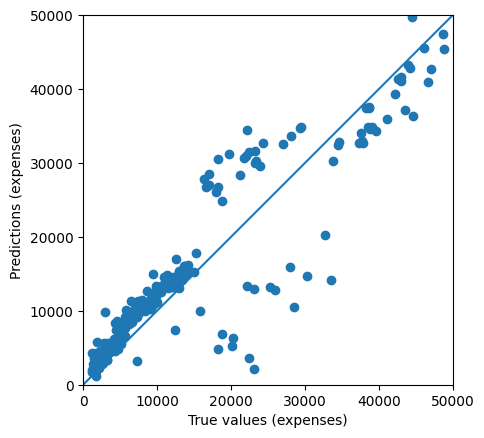

In [13]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
